# One-sample t-test

In [ ]:
import numpy as np
from scipy import stats
data = [2.3,2.5,2.8,3.11,2.9,3.3,3.0]
population_mean = 3.5
t_stat, p_value = stats.ttest_1samp(data, population_mean)
print(f"T-statistics = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")

T-statistics = -4.9999
P-value = 0.0025


## 🧠 Interpretation:


If p-value < 0.05: Reject the null hypothesis — the sample mean is significantly different from the population mean.

If p-value ≥ 0.05: Fail to reject the null hypothesis — no significant difference.

## 🎯 Scenario:


A nutritionist claims that the average daily protein intake for adults in a certain city is 50 grams. You collected a sample of 10 adults to check whether the average intake differs from this claim.

In [ ]:
import numpy as np
from scipy import stats
sample_protein = [40,52,47,53,50,46,49,55,51,54]

claimed_mean = 50
t_stat, p_value = stats.ttest_1samp(sample_protein,claimed_mean)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis. The average intake is significantlt different from 50g")
else:
    print("❌ Fail to reject the null hypothesis: No significant different from 50g")

T-statistic: -0.2121
P-value: 0.8368
❌ Fail to reject the null hypothesis: No significant different from 50g


## Explanantion

let u = The mean protein intake  
H0 (Null Hypothesis): u = 50g  
H1 (Alternative Hypothesis): u != 50g

## Visualize

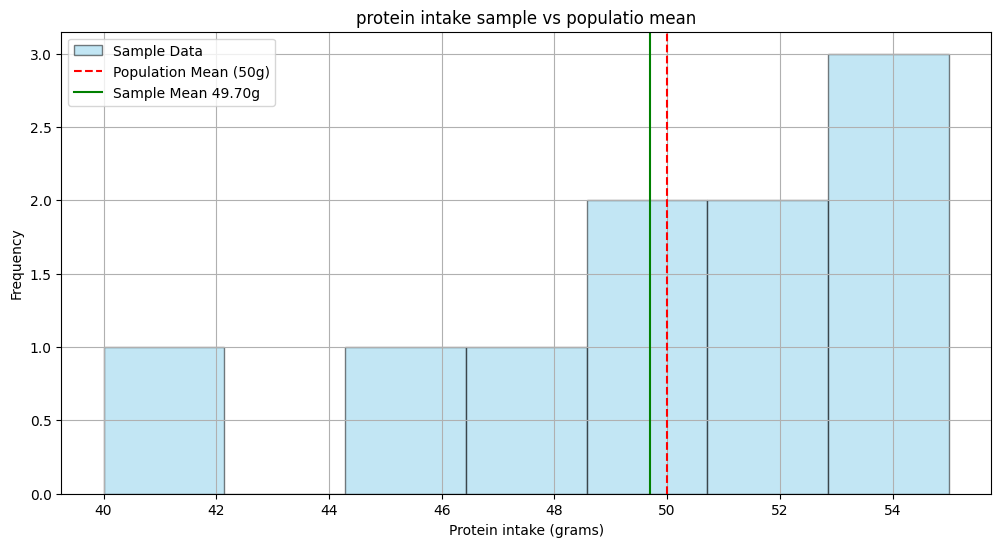

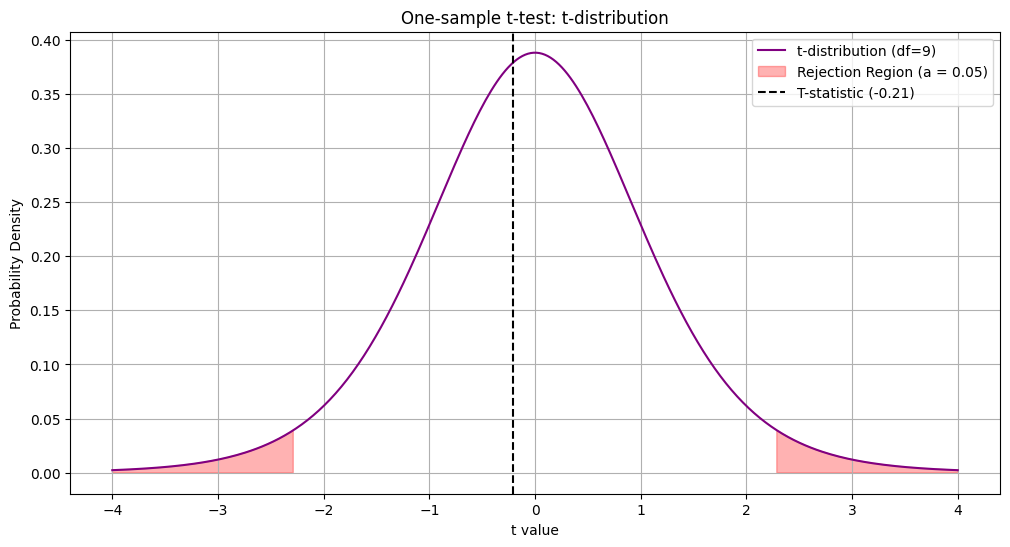

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

sample = [40, 52, 47, 53, 50, 46, 49, 55, 51, 54]
population_mean = 50
alpha = 0.05
t_stat, p_value = stats.ttest_1samp(sample, population_mean)
sample_mean = np.mean(sample)
df = len(sample) - 1

plt.figure(figsize=(12, 6))
plt.hist(
    sample, bins=7, alpha=0.5, label="Sample Data", color="skyblue", edgecolor="black"
)
plt.axvline(population_mean, color="red", linestyle="--", label="Population Mean (50g)")
# plt.axvline(population_mean, color="red", linestyle="-", label="Population Mean (50g)")
plt.axvline(
    sample_mean, color="green", linestyle="-", label=f"Sample Mean {sample_mean:.2f}g"
)

plt.title("protein intake sample vs populatio mean")
plt.xlabel("Protein intake (grams)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

x = np.linspace(-4, 4, 300)
y = stats.t.pdf(x, df)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label="t-distribution (df=9)", color="purple")
plt.fill_between(
    x,
    y,
    where=(x < stats.t.ppf(alpha / 2, df)) | (x > stats.t.ppf(1 - alpha / 2, df)),
    color="red",
    alpha=0.3,
    label="Rejection Region (a = 0.05)",
)
plt.axvline(t_stat, color='black', linestyle='--', label=f'T-statistic ({t_stat:.2f})')

plt.title('One-sample t-test: t-distribution')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# One-sample t-test (two-tailed, right-tailed, left-tailed)

## 🎯 Scenario (Two-tailed)

A nutritionist claims that the average daily protein intake for adults in a certain city is 50 grams. You collected a sample of 10 adults to check whether the average intake differs from this claim.

Null Hypothesis (H₀): 	μ = μ₀  
Alternative Hypothesis (	H₁): 	μ ≠ μ₀

## 🎯 Scenario (Right-tailed)

A nutritionist claims that the average daily protein intake for adults in a certain city is at most 50 grams. You collected a sample of 10 adults to check whether the average intake differs from this claim.

Null Hypothesis (H₀): μ ≤ μ₀  
Alternative Hypothesis ( H₁): μ > μ₀

## 🎯 Scenario (Left-tailed)

A nutritionist claims that the average daily protein intake for adults in a certain city is at least 50 grams. You collected a sample of 10 adults to check whether the average intake differs from this claim.

Null Hypothesis (H₀): μ ≥ μ₀  
Alternative Hypothesis ( H₁): μ < μ₀

## 👉 Code

In [929]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

sample = np.random.normal(55, 15, 10)
print(sample)
# plt.hist(sample, bins=50, density=True)
# plt.title("Normal Distribution (μ=100, σ=15)")
# plt.xlabel("Sample Value (x-axis)")
# plt.ylabel("Probability Density (y-axis)")
# plt.show()


population_mean = 50
alpha = 0.05
df = len(sample) - 1

t_stat, p_value = stats.ttest_1samp(sample,population_mean, alternative="two-sided")
_, p_value_right_tailed = stats.ttest_1samp(sample, population_mean, alternative="greater")
_, p_value_left_tailed = stats.ttest_1samp(sample, population_mean, alternative="less")

r = stats.t.sf(t_stat, df)
l = stats.t.cdf(t_stat, df)


print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (Two-tailed) : {p_value:.4f}")
print(f"P-value (Right-tailed) : {p_value_right_tailed:.4f}")
print(f"P-value (Left-tailed) : {p_value_left_tailed:.4f}")

print(f"r = {r:.4f}")
print(f"l = {l:.4f}")

print(f"p_value_right_tailed = r") if p_value_right_tailed == r else print(f"p_value_right_tailed != r")
print(f"p_value_left_tailed = l") if p_value_left_tailed == l else print(f"p_value_left_tailed != l")

print('--- Test conclusion ---')
if p_value < alpha:
    print("Two-tailed: ✅ Reject the null hypothesis (H₀) - Sample mean != population mean")
else:
    print("Two-tailed: ❌ Fail to reject the null hypothesis (H₀)")

if p_value_right_tailed < alpha:
    print("Right-tailed: ✅ Reject the null hypothesis (H₀) - Sample mean > population mean")
else:
    print("Right-tailed: ❌ Fail to reject the null hypothesis (H₀)")

if p_value_left_tailed < alpha:
    print("Left-tailed: ✅ Reject the null hypothesis (H₀) - Sample mean < population mean")
else:
    print("Left-tailed: ❌ Fail to reject the null hypothesis (H₀)")

[58.60835811 87.27606358 37.94337349 69.67682698 50.78237281 62.72886415
 53.08576405 49.55667856 66.18880374 73.40783733]
T-statistic: 2.4534
P-value (Two-tailed) : 0.0366
P-value (Right-tailed) : 0.0183
P-value (Left-tailed) : 0.9817
r = 0.0183
l = 0.9817
p_value_right_tailed = r
p_value_left_tailed = l
--- Test conclusion ---
Two-tailed: ✅ Reject the null hypothesis (H₀) - Sample mean != population mean
Right-tailed: ✅ Reject the null hypothesis (H₀) - Sample mean > population mean
Left-tailed: ❌ Fail to reject the null hypothesis (H₀)
